In [13]:
import tensorflow as tf
from numpy import unique , argmax 
from matplotlib import pyplot
import matplotlib.pyplot as plt
import numpy as np

**Dividing into train and Test datasets**

In [14]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [15]:
x_train =x_train.reshape((x_train.shape[0] , x_train.shape[1],x_train.shape[2],1))
x_test =x_test.reshape((x_test.shape[0] , x_test.shape[1],x_test.shape[2],1))

np.random.seed(42)
tf.random.set_seed(42)

In [16]:
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

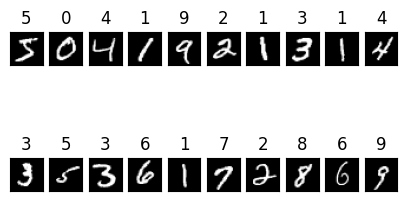

In [17]:
fig=plt.figure(figsize=(5,3))
for i in range(20):
    ax =fig.add_subplot(2,10,i+1 ,xticks=[] ,yticks=[])
    ax.imshow(np.squeeze(x_train[i]), cmap='gray')
    ax.set_title(y_train[i])

In [18]:
img_shape= x_train.shape[1:]
img_shape

(28, 28, 1)

**BUILDING NEURAL NETWORK THAT CAN READ HANDWRITING**

In [19]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


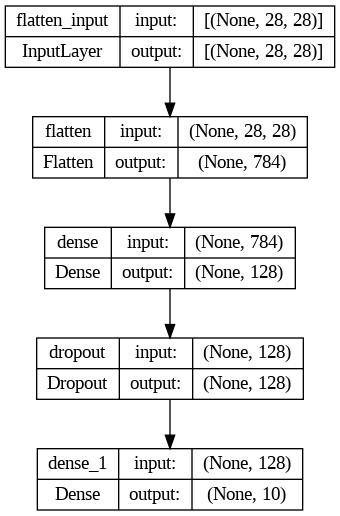

In [21]:
from tensorflow.keras.utils import plot_model
plot_model(model, 'model.jpg', show_shapes=True)

In [22]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.3101945 ,  0.06903812,  0.04522163,  0.05209346,  0.37996054,
        -0.04902433,  0.52545774,  0.04666989, -0.04984564,  0.47106087]],
      dtype=float32)

In [23]:
tf.nn.softmax(predictions).numpy()

array([[0.06315612, 0.09228139, 0.09010953, 0.09073088, 0.12593487,
        0.08200498, 0.14565809, 0.09024012, 0.08193766, 0.1379464 ]],
      dtype=float32)

In [24]:

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(y_train[:1], predictions).numpy()
model.compile(optimizer='adam',loss=loss_fn,metrics=['accuracy'])


**Model fitting**

In [25]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2983 - accuracy: 0.9127
Epoch 2/5
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1470 - accuracy: 0.9569
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1110 - accuracy: 0.9666
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0891 - accuracy: 0.9725
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0774 - accuracy: 0.9755


In [26]:
model.evaluate(x_test, y_test, verbose=5)

[0.07709167152643204, 0.9763000011444092]

In [27]:
probability_model = tf.keras.Sequential([ model,tf.keras.layers.Softmax() ])
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.12745980e-07, 9.90894211e-09, 4.32272327e-06, 1.07209700e-04,
        4.67395705e-11, 8.90265923e-08, 7.26618540e-14, 9.99887824e-01,
        3.31088685e-08, 4.12500071e-07],
       [1.10639631e-08, 5.01179784e-05, 9.99935031e-01, 1.19935494e-05,
        1.39039027e-14, 1.49280436e-06, 2.60083137e-08, 7.86327180e-14,
        1.35286155e-06, 5.28108752e-13],
       [1.21722474e-06, 9.97844577e-01, 4.97646048e-04, 8.49149455e-06,
        2.47255557e-05, 3.07002369e-06, 1.04405735e-05, 1.56885991e-03,
        4.08170163e-05, 1.64199548e-07],
       [9.99578774e-01, 2.75585332e-08, 3.05790250e-04, 3.37669832e-07,
        1.60776334e-08, 7.79469883e-06, 9.56792337e-06, 6.95826088e-07,
        1.02861378e-07, 9.68464592e-05],
       [2.38136290e-05, 4.15370096e-07, 2.32063612e-04, 3.41686018e-06,
        9.74967778e-01, 2.79715714e-05, 8.89868988e-06, 5.46526680e-05,
        1.85492991e-06, 2.46792007e-02]], dtype=float32)>

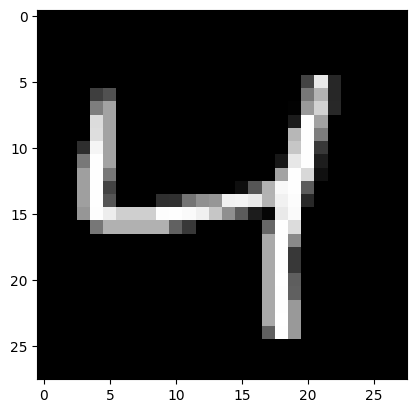

In [48]:
img = x_train[2]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

In [33]:
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img])
print("predicted : {}".format(argmax(p)))

1/1 [==============================] - 0s 160ms/step
predicted : 4


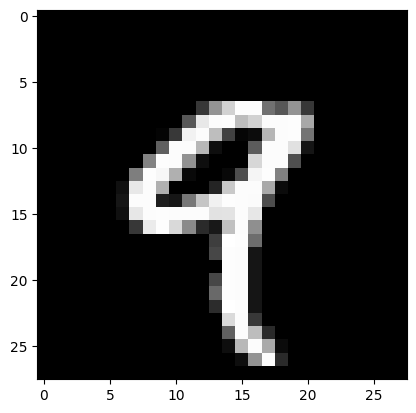

In [45]:
img = x_train[4]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

In [31]:
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img])
print("predicted : {}".format(argmax(p)))

1/1 [==============================] - 0s 39ms/step
predicted : 9


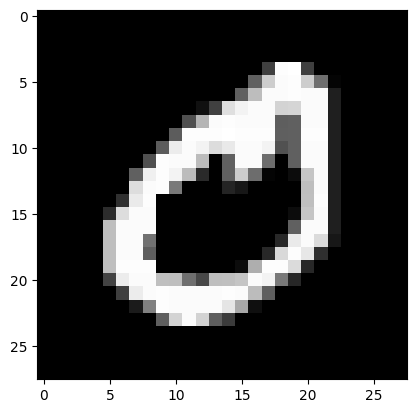

In [49]:
img = x_train[21]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

In [50]:
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img])
print("predicted : {}".format(argmax(p)))

1/1 [==============================] - 0s 131ms/step
predicted : 0


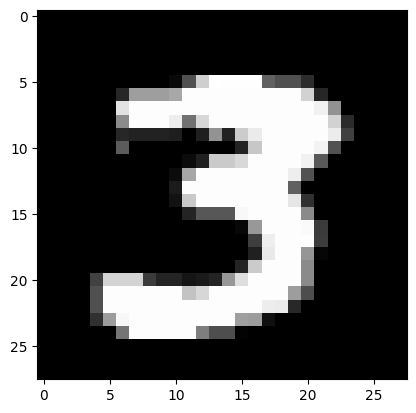

In [54]:
img = x_train[27]
plt.imshow(np.squeeze(img) ,cmap='gray')
plt.show()

In [55]:
img= img.reshape(1, img.shape[0],img.shape[1],img.shape[2])
p= model.predict([img])
print("predicted : {}".format(argmax(p)))

1/1 [==============================] - 0s 25ms/step
predicted : 3


***THANK YOU!!!!!***